In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib

In [18]:
# Load the dataset
df = pd.read_csv('house_price.csv')

In [19]:
# Encode categorical features
label_encoders = {}
for column in ['Location', 'Condition', 'Garage']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [20]:
# Features and target
X = df.drop(columns=['Id', 'Price'])
y = df['Price']

In [21]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [23]:
# Dictionary to store model performance
performance = {}

In [24]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    performance[name] = {'MSE': mse, 'R2': r2}

In [25]:
# Create DataFrame for performance metrics
performance_df = pd.DataFrame(performance).T.reset_index().rename(columns={'index': 'Model'})

In [26]:
# Visualize Model Performance
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

C:\Users\hariv\AppData\Local\Temp\ipykernel_6856\1651582999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=performance_df, palette='coolwarm')


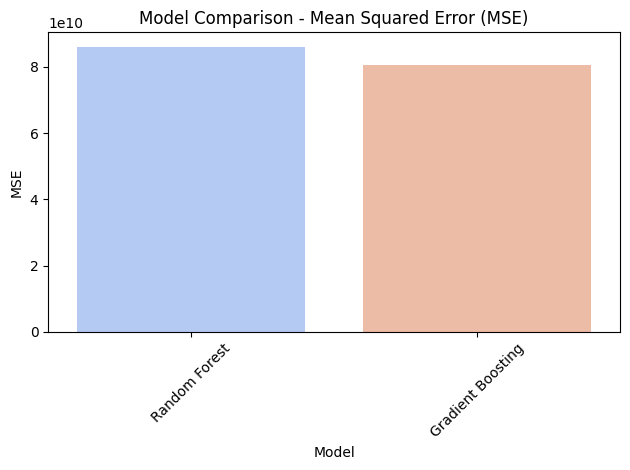

In [27]:
# MSE Bar Plot
sns.barplot(x='Model', y='MSE', data=performance_df, palette='coolwarm')
plt.title('Model Comparison - Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
# Choose the best model based on lowest MSE
best_model_name = min(performance, key=lambda x: performance[x]['MSE'])
best_model = models[best_model_name]

In [29]:
# Scatter Plot: Actual vs Predicted Prices for the best model
y_pred_best = best_model.predict(X_test)

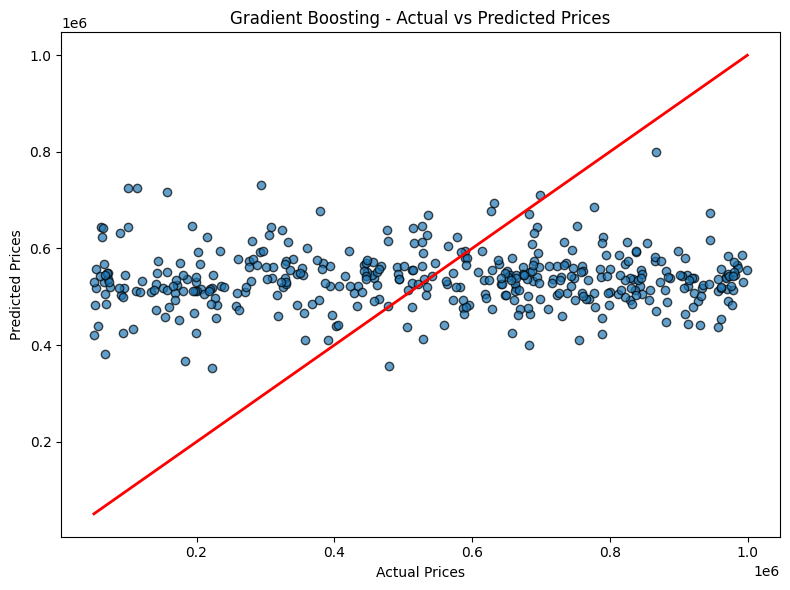

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.7, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'{best_model_name} - Actual vs Predicted Prices')
plt.tight_layout()
plt.show()

C:\Users\hariv\AppData\Local\Temp\ipykernel_6856\2989960032.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'], shade=True)


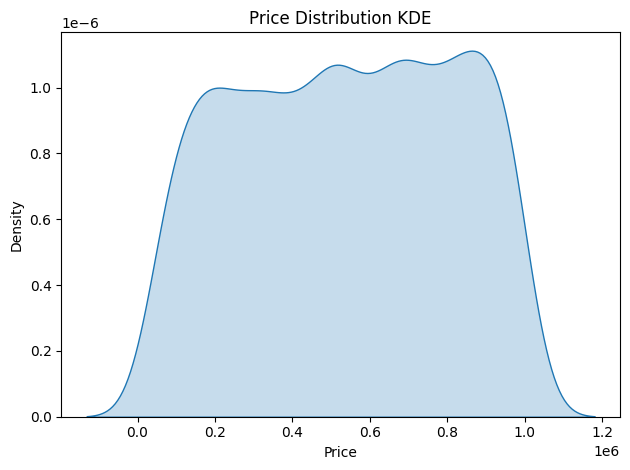

In [31]:
# KDE Plot: Price distribution
sns.kdeplot(df['Price'], shade=True)
plt.title('Price Distribution KDE')
plt.tight_layout()
plt.show()


In [32]:
# Save the best model to a file
joblib.dump(best_model, 'house_price_predictor_model.pkl')

['house_price_predictor_model.pkl']

In [33]:
print(f"The best model is {best_model_name} and has been saved.")

The best model is Gradient Boosting and has been saved.
